<a href="https://colab.research.google.com/github/georgywasiat/-Financial-Sentiment-Analysis/blob/main/FInancial_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisis Sentimen Finansial dengan menggunakan Algoritma Support Vektor Machine dan PCA

Georgy Banny Rizky Wasiat

# Persiapan Data

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
financial = pd.read_csv('/content/drive/My Drive/Portofolio/data.csv')

financial_df = pd.DataFrame(financial)

In [ ]:
financial_df.head(10)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


In [ ]:
#Pemahaman Data
print("Info dataset:")
print(financial.info())

#Penanganan Data Duplikat
financial.drop_duplicates(inplace=True)

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB
None


In [ ]:
# Tentukan kolom teks dan label sentimen
text_column = 'Sentence'  # Gantilah dengan nama kolom teks pada dataset Anda
sentiment_column = 'Sentiment'  # Gantilah dengan nama kolom sentimen pada dataset Anda

# Fungsi untuk membersihkan teks
def clean_text(text):
    # Menghapus karakter yang tidak diperlukan, tanda baca, atau simbol khusus
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))

    # Normalisasi teks: mengubah huruf kapital menjadi huruf kecil
    text = text.lower()

    # Menghapus kata-kata tidak relevan atau noise (contoh: kata dengan panjang kurang dari 3)
    text = ' '.join(word for word in text.split() if len(word) > 2)

    return text

# Terapkan fungsi ke kolom teks pada dataset
financial[text_column] = financial[text_column].apply(clean_text)

# Cetak informasi dataset setelah pembersihan teks
print(financial[[text_column, sentiment_column]].head())

                                            Sentence Sentiment
0  the geosolutions technology will leverage bene...  positive
1             esi lows down 150 250 real possibility  negative
2  for the last quarter 2010 componenta net sales...  positive
3  according the finnishrussian chamber commerce ...   neutral
4  the swedish buyout firm has sold its remaining...   neutral


In [ ]:
# Unduh sumber daya NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Fungsi untuk melakukan tokenisasi
def tokenize_text(text):
    # Tokenisasi teks menggunakan NLTK
    tokens = word_tokenize(text)

    return tokens

# Terapkan fungsi tokenisasi ke kolom teks pada dataset
financial['Tokens'] = financial[text_column].apply(tokenize_text)

# Cetak informasi dataset setelah tokenisasi
print(financial[[text_column, 'Tokens', sentiment_column]].head())

                                            Sentence  \
0  the geosolutions technology will leverage bene...   
1             esi lows down 150 250 real possibility   
2  for the last quarter 2010 componenta net sales...   
3  according the finnishrussian chamber commerce ...   
4  the swedish buyout firm has sold its remaining...   

                                              Tokens Sentiment  
0  [the, geosolutions, technology, will, leverage...  positive  
1     [esi, lows, down, 150, 250, real, possibility]  negative  
2  [for, the, last, quarter, 2010, componenta, ne...  positive  
3  [according, the, finnishrussian, chamber, comm...   neutral  
4  [the, swedish, buyout, firm, has, sold, its, r...   neutral  


In [ ]:
# Fungsi untuk melakukan stopword removal
def remove_stopwords(tokens):
    # Mengambil stopword dalam bahasa Inggris
    stop_words = set(stopwords.words('english'))
    # Menghapus stopword dari tokenisasi
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

# Membuat DataFrame
financial = pd.DataFrame(financial)

# Kolom teks pada dataset
text_column = 'text_column'

# Terapkan fungsi stopword removal ke kolom Tokens
financial['Tokens'] = financial['Tokens'].apply(remove_stopwords)

In [ ]:
# Fungsi untuk melakukan stemming
def stem_text(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Fungsi untuk melakukan lemmatization
def lemmatize_text(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Terapkan fungsi stemming ke kolom Tokens pada dataset
financial['Stemmed_Tokens'] = financial['Tokens'].apply(stem_text)

# Terapkan fungsi lemmatization ke kolom Tokens pada dataset
financial['Lemmatized_Tokens'] = financial['Tokens'].apply(lemmatize_text)

# Cetak informasi dataset setelah tokenisasi, stemming, dan lemmatization
print(financial[['Tokens', 'Stemmed_Tokens', 'Lemmatized_Tokens', sentiment_column]].head())

                                              Tokens  \
0  [geosolutions, technology, leverage, benefon, ...   
1           [esi, lows, 150, 250, real, possibility]   
2  [last, quarter, 2010, componenta, net, sales, ...   
3  [according, finnishrussian, chamber, commerce,...   
4  [swedish, buyout, firm, sold, remaining, 224, ...   

                                      Stemmed_Tokens  \
0  [geosolut, technolog, leverag, benefon, gp, so...   
1                [esi, low, 150, 250, real, possibl]   
2  [last, quarter, 2010, componenta, net, sale, d...   
3  [accord, finnishrussian, chamber, commerc, maj...   
4  [swedish, buyout, firm, sold, remain, 224, per...   

                                   Lemmatized_Tokens Sentiment  
0  [geosolutions, technology, leverage, benefon, ...  positive  
1            [esi, low, 150, 250, real, possibility]  negative  
2  [last, quarter, 2010, componenta, net, sale, d...  positive  
3  [according, finnishrussian, chamber, commerce,...   neutral  
4

In [ ]:
# ... (Kode sebelumnya)

# Gabungkan kembali tokens menjadi kalimat
financial['Processed_Text'] = financial['Lemmatized_Tokens'].apply(lambda tokens: ' '.join(tokens)) #yang dipilih adalah lemmatized

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words=stopwords.words('english'))

# Ekstraksi fitur menggunakan TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(financial['Processed_Text'])

# Konversi hasil ekstraksi fitur menjadi DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Gabungkan hasil ekstraksi fitur dengan kolom label sentimen
final_data = pd.concat([tfidf_df, financial[sentiment_column]], axis=1)

# Cetak informasi dataset setelah ekstraksi fitur
print(final_data.head())


   000  100  12month  135       150  200  2004  2005  2006  2007  ...  worth  \
0  0.0  0.0      0.0  0.0  0.000000  0.0   0.0   0.0   0.0   0.0  ...    0.0   
1  0.0  0.0      0.0  0.0  0.614215  0.0   0.0   0.0   0.0   0.0  ...    0.0   
2  0.0  0.0      0.0  0.0  0.000000  0.0   0.0   0.0   0.0   0.0  ...    0.0   
3  0.0  0.0      0.0  0.0  0.000000  0.0   0.0   0.0   0.0   0.0  ...    0.0   
4  0.0  0.0      0.0  0.0  0.000000  0.0   0.0   0.0   0.0   0.0  ...    0.0   

   would  x20ac      year  yearonyear  yesterday  yet  yhoo  yit  Sentiment  
0    0.0    0.0  0.000000         0.0        0.0  0.0   0.0  0.0   positive  
1    0.0    0.0  0.000000         0.0        0.0  0.0   0.0  0.0   negative  
2    0.0    0.0  0.204461         0.0        0.0  0.0   0.0  0.0   positive  
3    0.0    0.0  0.000000         0.0        0.0  0.0   0.0  0.0    neutral  
4    0.0    0.0  0.000000         0.0        0.0  0.0   0.0  0.0    neutral  

[5 rows x 1001 columns]


In [ ]:
final_data.head(100)

,000,100,12month,135,150,200,2004,2005,2006,2007,...,worth,would,x20ac,year,yearonyear,yesterday,yet,yhoo,yit,Sentiment
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,positive
1,0.0,0.0,0.0,0.0,0.614215,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,negative
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.204461,0.0,0.0,0.0,0.0,0.0,positive
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,neutral
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,neutral
96,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.377802,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,neutral
97,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,neutral
98,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,negative


In [ ]:
final_data.isna().sum()

000          6
100          6
12month      6
135          6
150          6
            ..
yesterday    6
yet          6
yhoo         6
yit          6
Sentiment    6
Length: 1001, dtype: int64

In [ ]:
final_data = final_data.fillna(final_data.mean())

<ipython-input-15-c63a87a635cc>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  final_data = final_data.fillna(final_data.mean())


In [ ]:
# Hitung distribusi kelas pada atribut "Sentimen"
sentimen_distribution = final_data['Sentiment'].value_counts()

# Cetak distribusi kelas
print(sentimen_distribution)

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64


# Evaluasi menggunakan 3 Kelas

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64


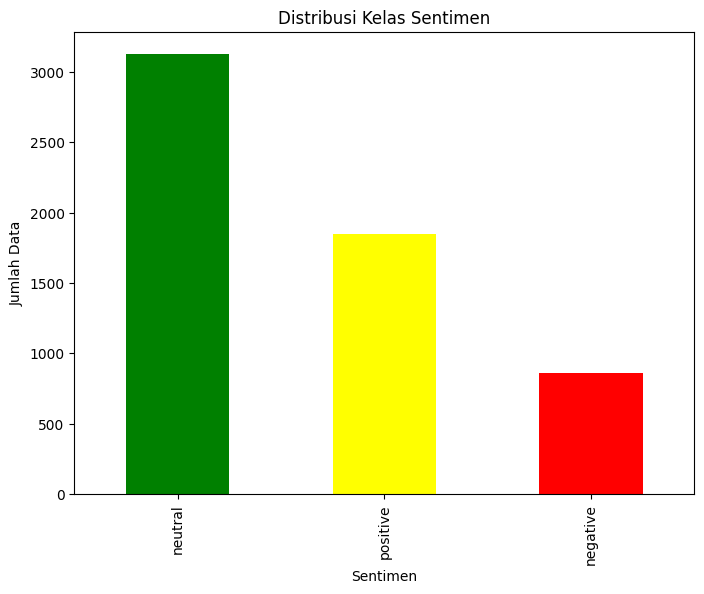

In [ ]:
# Cetak distribusi kelas
print(sentimen_distribution)

# Plot distribusi kelas
plt.figure(figsize=(8, 6))
sentimen_distribution.plot(kind='bar', color=['green', 'yellow', 'red'])
plt.title('Distribusi Kelas Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Data')
plt.show()

In [ ]:
# Isi nilai NaN pada kolom "Sentimen" dengan "Neutral"
final_data['Sentiment'] = final_data['Sentiment'].fillna('neutral')

# Verifikasi perubahan
print(final_data['Sentiment'].value_counts())


neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64


In [ ]:
# Pisahkan fitur dan label
X = final_data.drop(sentiment_column, axis=1)
y = final_data[sentiment_column]

# Terapkan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Buat DataFrame baru dari hasil PCA
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Bagi data menjadi set pelatihan dan pengujian (misalnya, 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
# Inisialisasi model SVM
svm_model = SVC()

# Latih model menggunakan data pelatihan
svm_model.fit(X_train, y_train)

# Prediksi label menggunakan data pengujian
y_pred = svm_model.predict(X_test)

# Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred,zero_division=1)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.5320786997433704
Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.00      0.00       175
     neutral       0.53      1.00      0.69       622
    positive       1.00      0.00      0.00       372

    accuracy                           0.53      1169
   macro avg       0.84      0.33      0.23      1169
weighted avg       0.75      0.53      0.37      1169



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

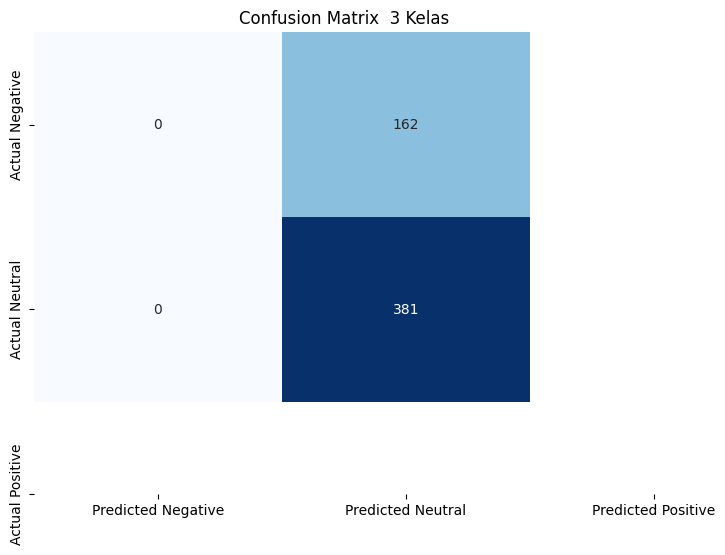

In [ ]:
# Visualisasi Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Neutral', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Neutral', 'Actual Positive'])
plt.title('Confusion Matrix  3 Kelas')
plt.show()

# Evaluasi menggunakan 2 Kelas

In [ ]:
# Hapus baris dengan sentimen "neutral"
new_final_data = final_data[final_data['Sentiment'] != 'neutral']

# Cetak DataFrame setelah penghapusan
print(new_final_data)

           000       100   12month       135       150       200      2004  \
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1     0.000000  0.000000  0.000000  0.000000  0.614215  0.000000  0.000000   
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
5832  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5835  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5836  0.001583  0.002742  0.001086  0.000872  0.001300  0.001418  0.003046   
5837  0.001583  0.002742  0.001086  0.000872  0.001300  0.001418  0.003046   
5841  0.001583  0.002742  0.001086  0.000872  0.001300  0.001418  0.003046   

          2005      2006      2007  ...     worth     would    

In [ ]:
# Hitung distribusi kelas pada atribut "Sentimen"
new_sentimen_distribution = new_final_data['Sentiment'].value_counts()

# Cetak distribusi kelas
print(new_sentimen_distribution)

positive    1852
negative     860
Name: Sentiment, dtype: int64


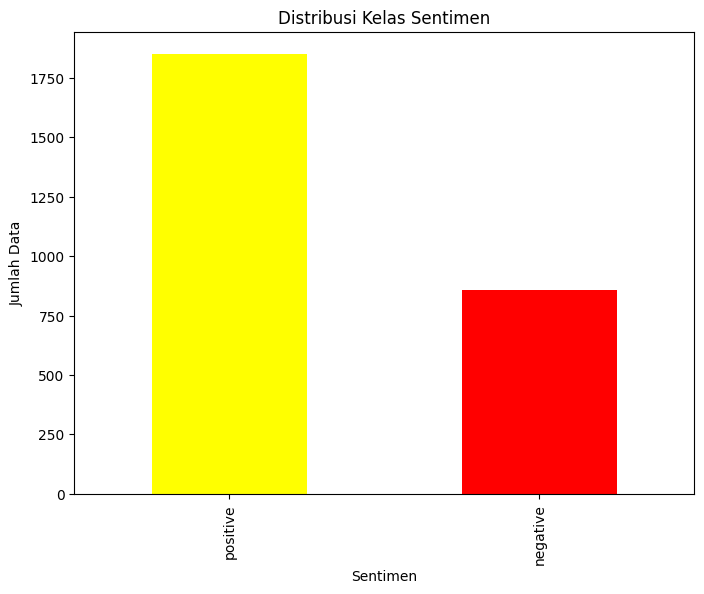

In [ ]:
# Plot distribusi kelas
plt.figure(figsize=(8, 6))
new_sentimen_distribution.plot(kind='bar', color=[ 'yellow', 'red'])
plt.title('Distribusi Kelas Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Data')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Pisahkan fitur dan label
X = new_final_data.drop(sentiment_column, axis=1)
y = new_final_data[sentiment_column]

# Terapkan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Buat DataFrame baru dari hasil PCA
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Gabungkan dengan label untuk analisis lebih lanjut
result_df = pd.concat([pca_df, y], axis=1)

# Tampilkan hasil
print(result_df.head(50))

# Bagi data menjadi set pelatihan dan pengujian (misalnya, 80% train, 20% test)
X_train_new, X_test_new, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

         PC1       PC2 Sentiment
0  -0.090909 -0.028468  positive
1  -0.075738 -0.032383  negative
2   0.194214  0.190206  positive
3  -0.091510 -0.055995       NaN
4  -0.079313 -0.030240       NaN
5  -0.032244  0.030318  positive
6   0.080933  0.175293  negative
7  -0.010413  0.007210  negative
8  -0.076668 -0.006992  positive
9   0.548704 -0.021914       NaN
10 -0.079894 -0.043750  positive
11 -0.058585 -0.023922  negative
12 -0.072964 -0.028733  positive
13 -0.081621 -0.033636       NaN
14 -0.076505 -0.036016       NaN
15 -0.069005 -0.008384  positive
16 -0.067426 -0.016225  positive
17 -0.070737 -0.024920       NaN
18  0.098509 -0.075976       NaN
19 -0.087359 -0.052199       NaN
20 -0.091895 -0.057933       NaN
21 -0.073929 -0.004533  positive
22 -0.067599 -0.020198       NaN
23 -0.063843  0.019204       NaN
24 -0.029340  0.081162       NaN
25 -0.096623 -0.057454  positive
26  0.154194  0.107386  positive
27  0.011022  0.101196       NaN
28  0.420017 -0.098449       NaN
29 -0.0609

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi model SVM
svm_model = SVC()

# Latih model menggunakan data pelatihan
svm_model.fit(X_train_new, y_train)

# Prediksi label menggunakan data pengujian
y_pred = svm_model.predict(X_test_new)

# Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred,zero_division=1)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.7016574585635359
Classification Report:
              precision    recall  f1-score   support

    negative       1.00      0.00      0.00       162
    positive       0.70      1.00      0.82       381

    accuracy                           0.70       543
   macro avg       0.85      0.50      0.41       543
weighted avg       0.79      0.70      0.58       543



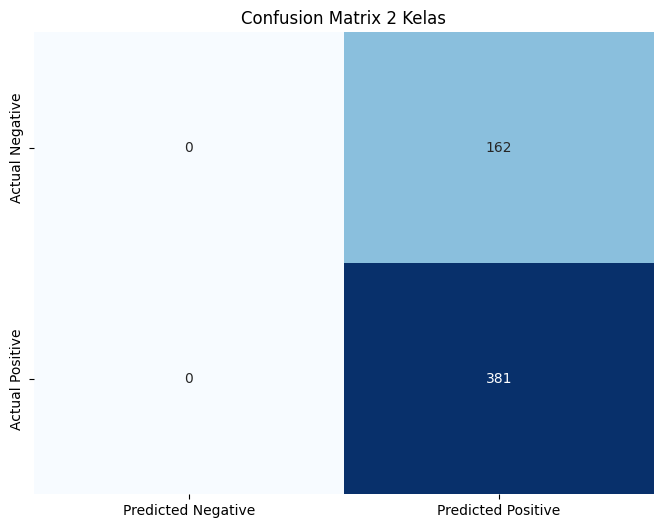

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix 2 Kelas')
plt.show()